# `Simple linear regression model with 1 Feature`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy, math

In [2]:
x_train = np.array([1.0, 1.5, 2.0, 2.7, 3.0])
y_train = np.array([250.0, 400.0, 500.0, 610.0, 700.0])

m = x_train.shape[0]

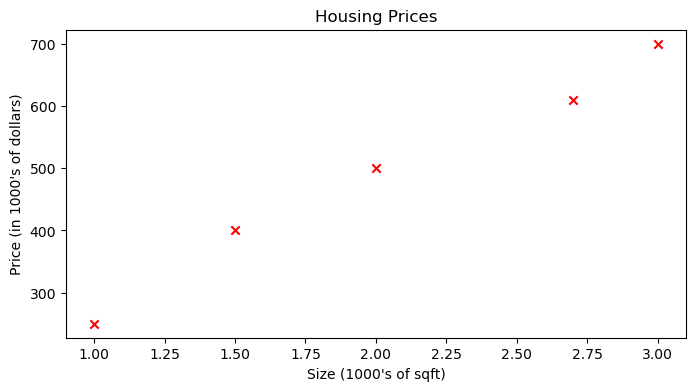

In [3]:
plt.figure(figsize=(8, 4))
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Housing Prices")
plt.ylabel("Price (in 1000's of dollars)")
plt.xlabel("Size (1000's of sqft)")
plt.show()

### $$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

In [4]:
def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
    return f_wb

### $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

In [5]:
def compute_cost(x, y, w, b): 
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

### $$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)}\\\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})\\
\end{align}
$$

In [6]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

In [7]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, compute_gradient):
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each itertion primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient function
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        
        # Update Parameters using equation above
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
        
        # Save cost J at each iteration
        if i<1000000:
            J_history.append( cost_function(x, y, w, b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db:0.3e} ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
    return w, b, J_history, p_history  # return w and J,w history for graphing

In [8]:
# Initialize parameters
w_init = 0
b_init = 0

# Some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2

# Run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)

print(f"(w,b) found by gradient descent: ({w_final:8.4f}, {b_final:8.4f})")

Iteration    0: Cost 1.19e+05  dj_dw: -1.119e+03, dj_db: -4.920e+02  w:  1.119e+01, b: 4.92000e+00
Iteration 1000: Cost 1.81e+02  dj_dw: -4.590e-01, dj_db: 1.037e+00  w:  2.071e+02, b: 7.05989e+01
Iteration 2000: Cost 1.75e+02  dj_dw: -1.733e-01, dj_db: 3.916e-01  w:  2.100e+02, b: 6.39731e+01
Iteration 3000: Cost 1.74e+02  dj_dw: -6.540e-02, dj_db: 1.478e-01  w:  2.111e+02, b: 6.14723e+01
Iteration 4000: Cost 1.74e+02  dj_dw: -2.468e-02, dj_db: 5.579e-02  w:  2.115e+02, b: 6.05283e+01
Iteration 5000: Cost 1.74e+02  dj_dw: -9.316e-03, dj_db: 2.106e-02  w:  2.117e+02, b: 6.01721e+01
Iteration 6000: Cost 1.74e+02  dj_dw: -3.516e-03, dj_db: 7.947e-03  w:  2.118e+02, b: 6.00376e+01
Iteration 7000: Cost 1.74e+02  dj_dw: -1.327e-03, dj_db: 3.000e-03  w:  2.118e+02, b: 5.99868e+01
Iteration 8000: Cost 1.74e+02  dj_dw: -5.009e-04, dj_db: 1.132e-03  w:  2.118e+02, b: 5.99677e+01
Iteration 9000: Cost 1.74e+02  dj_dw: -1.891e-04, dj_db: 4.273e-04  w:  2.118e+02, b: 5.99605e+01
(w,b) found by grad

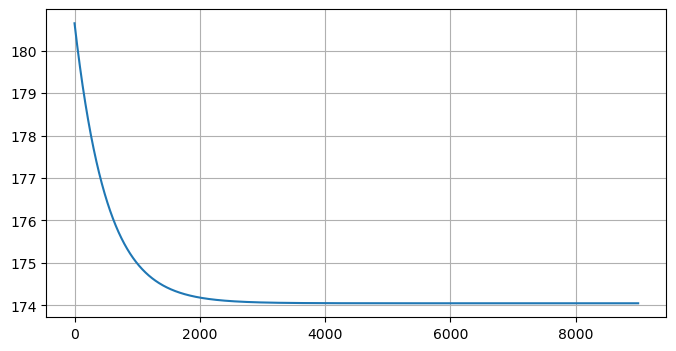

In [9]:
plt.figure(figsize=(8, 4))
plt.plot(J_hist[1000:])
plt.grid(True)

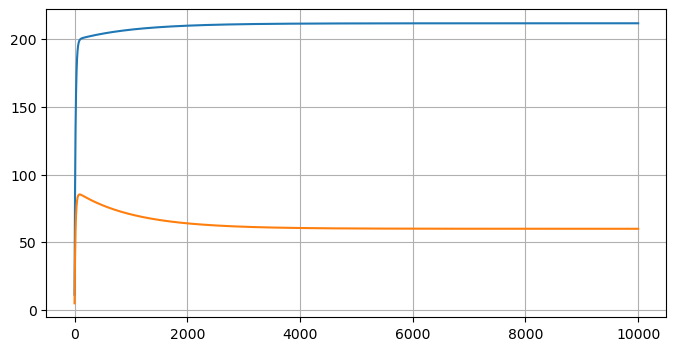

In [10]:
plt.figure(figsize=(8, 4))
plt.plot(p_hist)
plt.grid(True)

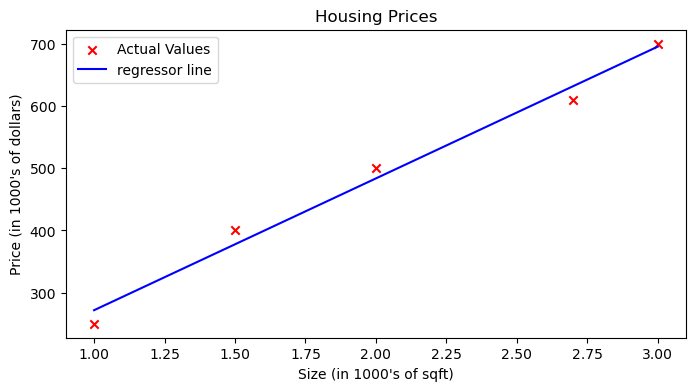

In [11]:
f_wb = compute_model_output(x_train, w_final, b_final)

plt.figure(figsize=(8, 4))
plt.scatter(x_train, y_train, marker='x', c='r', label="Actual Values")
plt.plot(x_train, f_wb, c='b', label="regressor line")

plt.title("Housing Prices")
plt.ylabel("Price (in 1000's of dollars)")
plt.xlabel("Size (in 1000's of sqft)")
plt.legend()
plt.show()

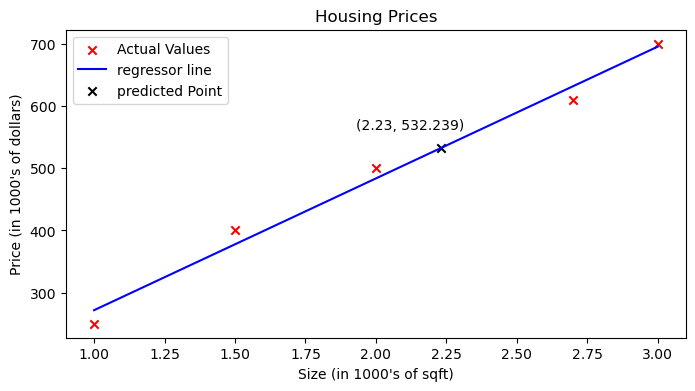

In [12]:
x_i = 2.23
tmp_f_wb = w_final * x_i + b_final

plt.figure(figsize=(8, 4))
plt.scatter(x_train, y_train, marker='x', c='r', label="Actual Values")
plt.plot(x_train, f_wb, c='b', label="regressor line")
plt.scatter(x_i, tmp_f_wb, marker='x', c='k', label='predicted Point', )
plt.annotate(text=f"({x_i}, {tmp_f_wb:.3f})", xy=[x_i-0.3, tmp_f_wb+30])

plt.title("Housing Prices")
plt.ylabel("Price (in 1000's of dollars)")
plt.xlabel("Size (in 1000's of sqft)")
plt.legend()
plt.show()

In [13]:
print(f"y_hat = ${tmp_f_wb:.3f}\n")

y_hat = $532.239

